In [14]:
import pandas as pd
import json
from pandas import json_normalize

# Load the JSON data
with open('/Users/trsaivarun/Downloads/response.json', 'r') as f:
    data = json.load(f)

# Normalize and flatten the JSON structure
# Normalize 'notices' list to a flat table
df = json_normalize(data['notices'], record_path=['works', 'infringing_urls'], 
                    meta=['id', 'type', 'title', 'date_sent', 'date_received', 
                          ['works', 'description']], 
                    record_prefix='infringing_')

# Rename the columns for clarity
df = df.rename(columns={
    'infringing_url': 'infringing URL',
    'works.description': 'work_description'
})

# Save the flattened data to CSV
df.to_csv('/Users/trsaivarun/Desktop/c_py:R/flattened_json_data.csv', index=False)


In [2]:
import socket
from urllib.parse import urlparse
from concurrent.futures import ThreadPoolExecutor

# Function to extract domain from a URL
def extract_domain(url):
    try:
        return urlparse(url).netloc
    except Exception as e:
        return None

# Function to get IP address for a domain
def get_ip(domain):
    try:
        return socket.gethostbyname(domain)
    except socket.gaierror:
        return None

# Extract domain from infringing URLs
df['domain'] = df['infringing URL'].apply(extract_domain)

# Parallelize IP resolution using ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=4) as executor:
    df['IP address'] = list(executor.map(get_ip, df['domain']))

# Save the updated DataFrame to CSV
df.to_csv('flattened_data_with_domain_ip__.csv', index=False)


In [5]:
df.isna().sum()

infringing URL         0
id                     0
type                   0
title                  0
date_sent              0
date_received          0
work_description       0
domain                19
IP address          3320
dtype: int64

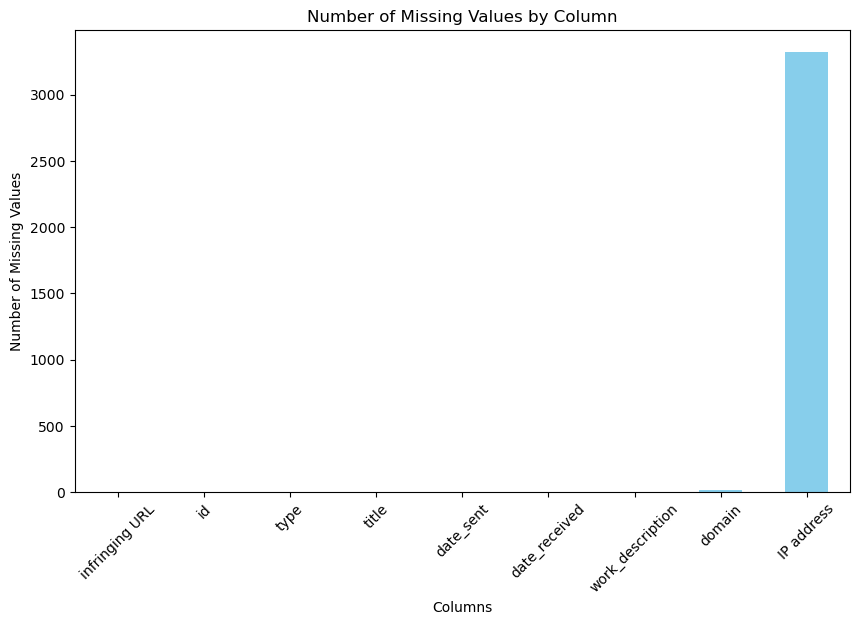

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with the IP addresses and domains
df = pd.read_csv('flattened_data_with_domain_ip__.csv')

# Count missing values for each column
missing_counts = df.isna().sum()

# Plot bar chart
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=45)
plt.show()



In [23]:
df['IP address'].fillna('not available', inplace=True) # not available since 3320 missing values
df = df.dropna(subset=['domain']) # just removing null since domains are 19 (values are small)


In [24]:
df.isna().sum()

infringing URL      0
id                  0
type                0
title               0
date_sent           0
date_received       0
work_description    0
domain              0
IP address          0
dtype: int64

In [25]:

df.isna().sum()

infringing URL      0
id                  0
type                0
title               0
date_sent           0
date_received       0
work_description    0
domain              0
IP address          0
dtype: int64

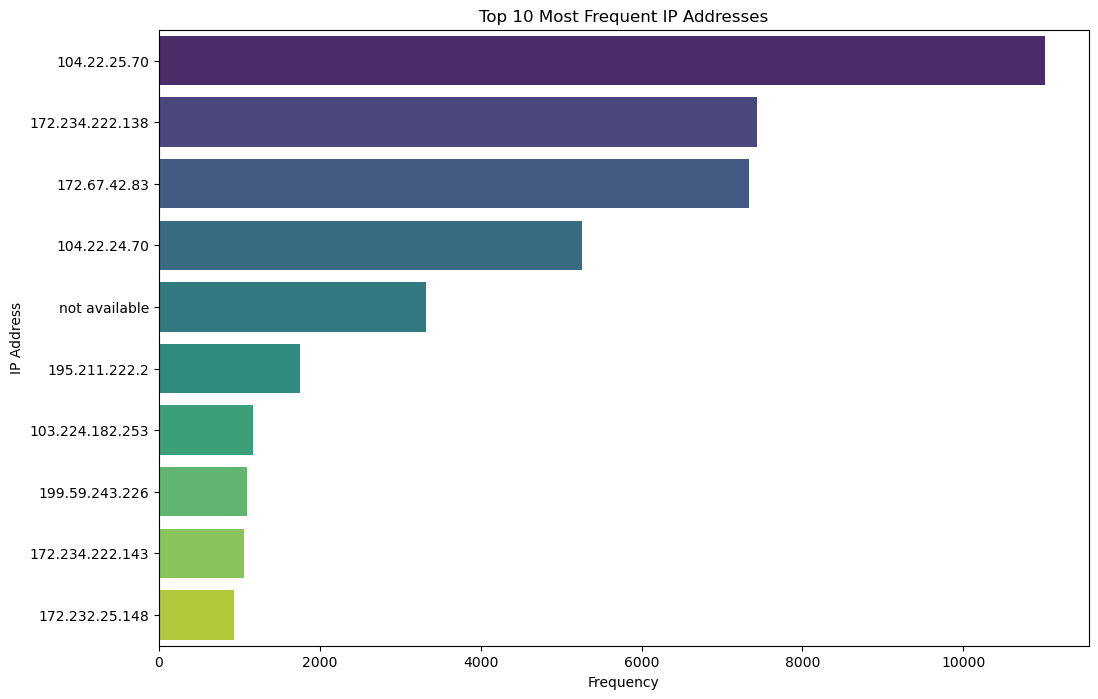

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the frequency of each IP address
ip_counts = df['IP address'].value_counts()

# Get the top 10 most frequent IP addresses
top_ip_addresses = ip_counts.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ip_addresses.values, y=top_ip_addresses.index, palette='viridis')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('IP Address')
plt.title('Top 10 Most Frequent IP Addresses')
plt.show()


In [27]:
# Summarization 1: Count of infringing URLs per domain
df['domain'].value_counts()


chomikuj.pl                         23605
watchepisodeseries.unblockit.onl     5422
rapidgator.net                       1760
www.torlock.cc                        932
ul.to                                 851
                                    ...  
www.film01stream.org                    1
www.freegamesdl.net                     1
www.filmxy.tv                           1
01streaming.fr                          1
www.zkouknito.cz                        1
Name: domain, Length: 3009, dtype: int64

In [28]:
# Summarization 3: Top 10 most frequent infringing URLs
df['infringing URL'].value_counts().head(10)


https://drive.google.com/file/d/1FsnGh2S_lxNEnp3Pp0VevlO8Tw5SC5ZB    2
https://drive.google.com/file/d/1tqRi2DiMjmeb_1KidMMcglWNEiJI4GIt    2
https://drive.google.com/file/d/1TJekGwVHJxoSSbgPzf3WV53DFx4yic2Y    2
https://drive.google.com/file/d/1tibAet-OUlazYuUOh0tFOtQfQr3X-7W8    2
https://drive.google.com/file/d/1SIr1jOKgD26TBRo7uOnCXHRTVJ6l8jG0    2
https://drive.google.com/file/d/1rv-89CQwtAv5nGT3tu9ZGYV48cknkvyo    2
https://drive.google.com/file/d/1RGbzMLTQw4zgy7YPjt15Qi8Seh7NSEHY    2
https://drive.google.com/file/d/1qMqeDOW5dGz1wnXZybp_f8Nf3u1hbtsf    2
https://drive.google.com/file/d/1qL3zla1W-PWkQEr0G7oS6ca3L1xF5i1W    2
https://drive.google.com/file/d/1QGMMbqy63N8KBdskK9DP-YIR2E8_9VsJ    2
Name: infringing URL, dtype: int64

In [29]:
# Summarization 2: Distribution of IP addresses across domains
df.groupby('domain')['IP address'].nunique()

domain
01234movies.email             1
0123movie.ru                  1
0123movie.show                1
0123movies.app                1
0123movies.city               1
                             ..
zooqle.unblockproject.casa    1
zooqle.uproxy.co              1
zoroflix.com                  1
zxcmovies.com                 3
zxmovies.xyz                  1
Name: IP address, Length: 3009, dtype: int64

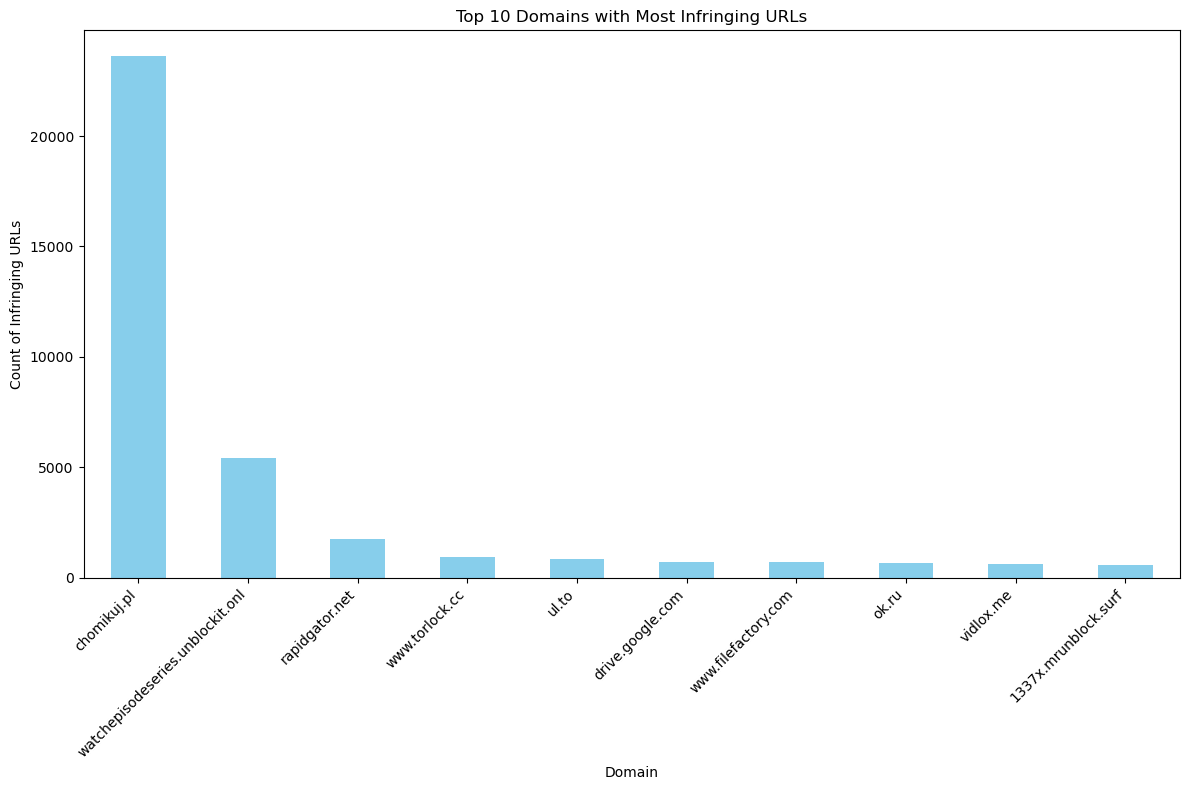

In [30]:
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('flattened_data_with_domain_ip__.csv')

# Count of infringing URLs per domain
domain_counts = df['domain'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
domain_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Domains with Most Infringing URLs')
plt.xlabel('Domain')
plt.ylabel('Count of Infringing URLs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_domains.png')
plt.show()


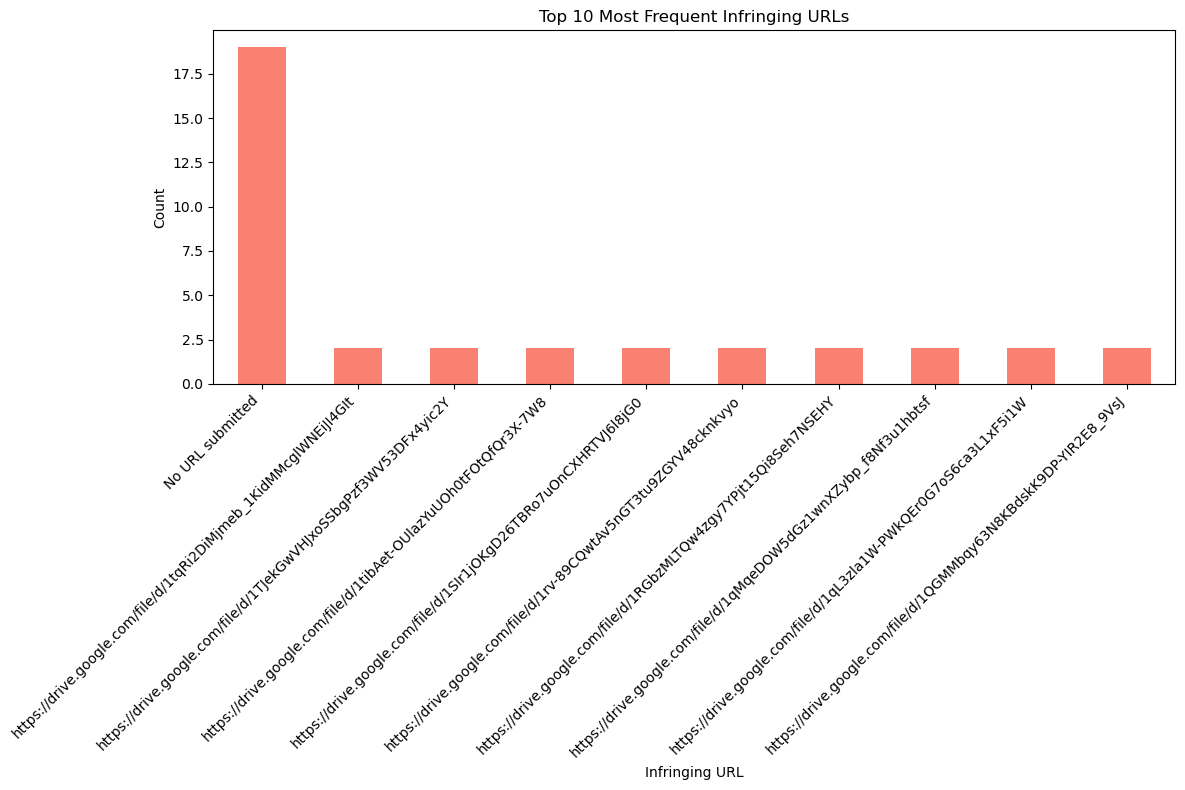

In [11]:
# Most frequent infringing URLs
url_counts = df['infringing URL'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
url_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Most Frequent Infringing URLs')
plt.xlabel('Infringing URL')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_infringing_urls.png')
plt.show()


In [31]:
import pandas as pd


# Count the frequency of each IP address
ip_counts = df['IP address'].value_counts()

# Display the top 10 most frequent IP addresses
top_ip_addresses = ip_counts.head(10)

print("Top 10 Most Frequent IP Addresses:")
print(top_ip_addresses)


Top 10 Most Frequent IP Addresses:
104.22.25.70       11010
172.234.222.138     7438
172.67.42.83        7340
104.22.24.70        5255
195.211.222.2       1760
103.224.182.253     1169
199.59.243.226      1101
172.234.222.143     1059
172.232.25.148       930
172.67.131.228       838
Name: IP address, dtype: int64


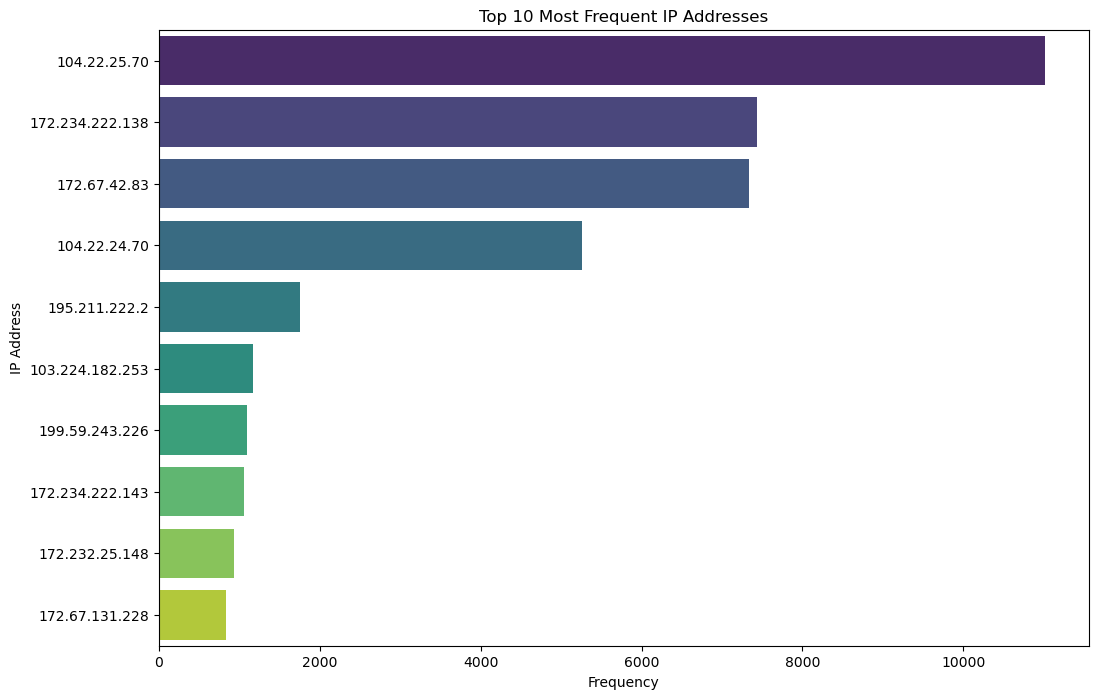

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Count the frequency of each IP address
ip_counts = df['IP address'].value_counts()

# Get the top 10 most frequent IP addresses
top_ip_addresses = ip_counts.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_ip_addresses.values, y=top_ip_addresses.index, palette='viridis')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('IP Address')
plt.title('Top 10 Most Frequent IP Addresses')
plt.show()


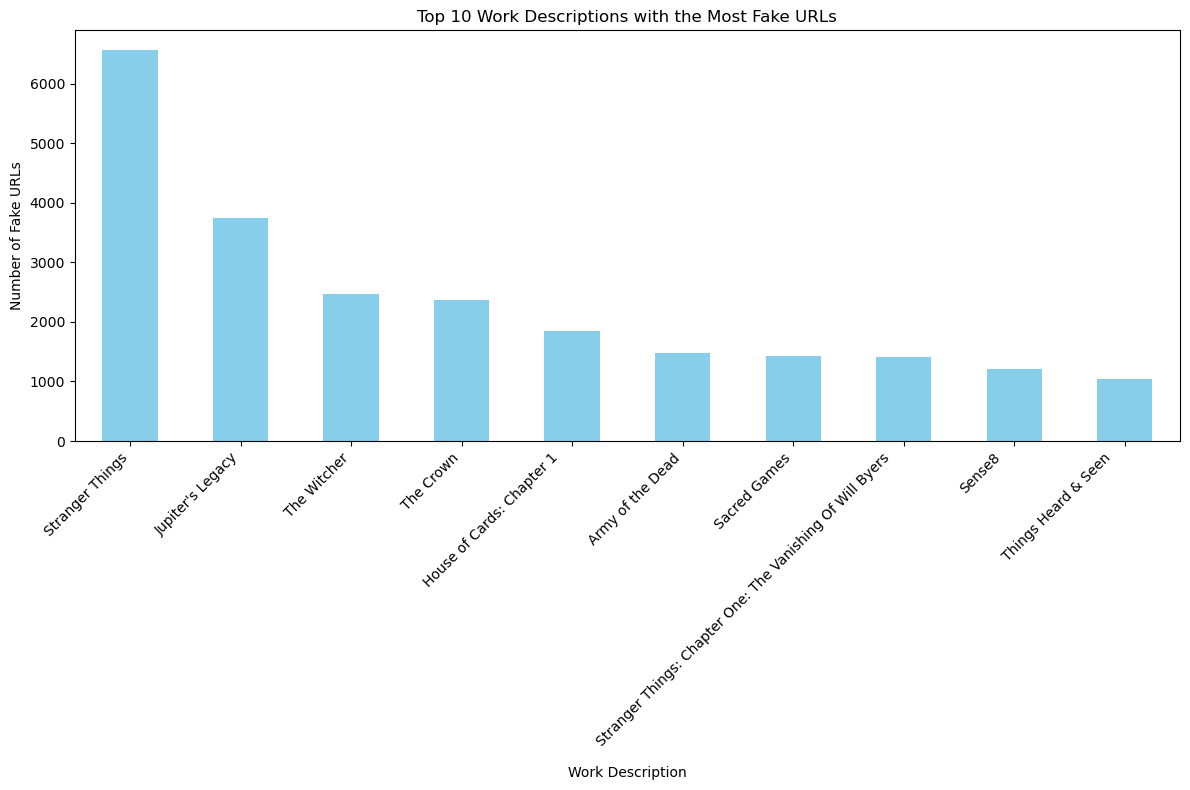

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the occurrences of each work_description
description_counts = df['work_description'].value_counts()

# Get the top 10 most frequent work_descriptions
top_10_descriptions = description_counts.head(10)

# Set font to handle special characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot the top 10 results
plt.figure(figsize=(12, 8))  # Adjust the size to accommodate longer labels
top_10_descriptions.plot(kind='bar', color='skyblue')
plt.title('Top 10 Work Descriptions with the Most Fake URLs')
plt.xlabel('Work Description')
plt.ylabel('Number of Fake URLs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


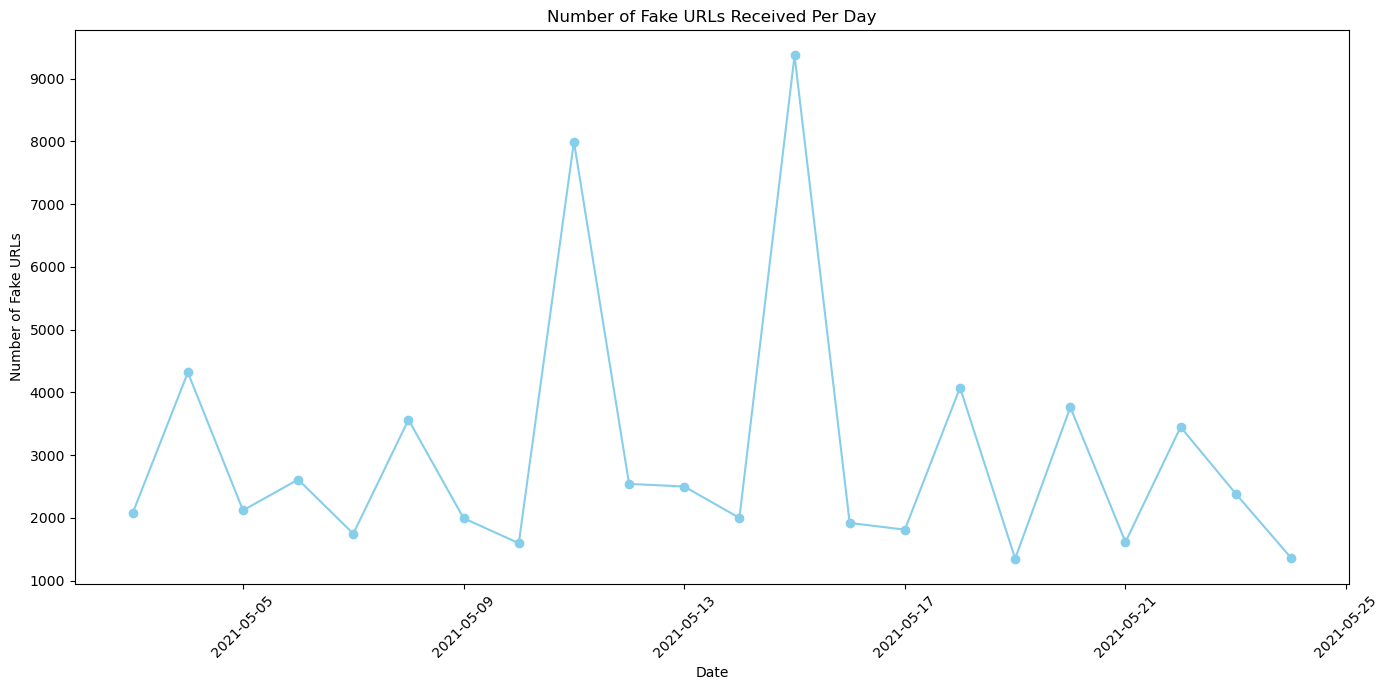

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_received' to datetime format if it's not already
df['date_received'] = pd.to_datetime(df['date_received'], errors='coerce')

# Count occurrences per day
daily_counts = df.groupby(df['date_received'].dt.date).size()

# Plot the daily counts
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Fake URLs Received Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Fake URLs')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
